# Write A Data Science Blog Post

## 1. Data Exploration (Exploratory Data Analysis - EDA)

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython import display
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('./listings.csv')

In [253]:
# Display the first few rows of the dataframe
print(df.head())

        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits at

In [254]:
# Get a concise summary of the dataframe (data types, non-null values)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 88 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  transit                           2884 non-null   object 
 11  thumbnail_url                     3498 non-null   object 
 12  medium

In [255]:
# Get basic statistics on numerical columns
print(df.describe())


                 id     scrape_id       host_id  host_listings_count  \
count  3.818000e+03  3.818000e+03  3.818000e+03          3818.000000   
mean   5.550111e+06  2.016010e+13  1.578556e+07             7.154531   
std    2.962660e+06  0.000000e+00  1.458382e+07            28.620995   
min    3.335000e+03  2.016010e+13  4.193000e+03             1.000000   
25%    3.258256e+06  2.016010e+13  3.275204e+06             1.000000   
50%    6.118244e+06  2.016010e+13  1.055814e+07             1.000000   
75%    8.035127e+06  2.016010e+13  2.590309e+07             3.000000   
max    1.034016e+07  2.016010e+13  5.320861e+07           502.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                3818.000000  3818.000000  3818.000000   3818.000000   
mean                    7.154531    47.628961  -122.333103      3.349398   
std                    28.620995     0.043052     0.031745      1.977599   
min                     1.000000    47.505088  

In [256]:
# Check for missing values
print(df.isnull().sum())

id                                  0
listing_url                         0
scrape_id                           0
last_scraped                        0
name                                0
                                   ..
require_guest_phone_verification    0
calculated_host_listings_count      0
reviews_per_month                   0
amenities_cleaned                   0
amenities_list                      0
Length: 88, dtype: int64


In [257]:
# Check the data types of each column
print(df.dtypes)


id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
amenities_cleaned                    object
amenities_list                       object
Length: 88, dtype: object


In [258]:
# Step 1: Display the first few rows and get the shape of the dataframe
print("The dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

The dataset has 3818 rows and 88 columns.


In [259]:

# Step 2: Find and display columns with more than 50% missing values
threshold = 0.4  # 50% threshold
missing_percent = df.isnull().mean()

# Display columns where the percentage of missing values is greater than 50%
cols_with_missing = missing_percent[missing_percent > threshold].index
print("Columns with more than 50% missing values:")
print(cols_with_missing)

# Optionally, if you want to see how much of each column is missing:
for col in cols_with_missing:
    print(f"{col}: {missing_percent[col]*100:.2f}% missing")

Columns with more than 50% missing values:
Index([], dtype='object')


In [260]:
# Step 1: Find columns with more than 50% missing values
threshold = 0.4  # 50% threshold
missing_percent = df.isnull().mean()

# Columns to drop
cols_to_drop = missing_percent[missing_percent > threshold].index

# Step 2: Drop the columns from the dataframe
df = df.drop(columns=cols_to_drop)

# Confirm the columns are dropped
print("Columns dropped:")
print(cols_to_drop)
print("Updated dataframe shape: {} rows, {} columns.".format(df.shape[0], df.shape[1]))


Columns dropped:
Index([], dtype='object')
Updated dataframe shape: 3818 rows, 88 columns.


In [261]:
# Display the count of missing values for each column
null_values = df.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(null_values[null_values > 0])

# Optionally, display the percentage of missing values
missing_percent = df.isnull().mean() * 100
print("\nPercentage of missing values in each column (where applicable):")
print(missing_percent[missing_percent > 0])


Columns with missing values:
summary                   177
space                     569
neighborhood_overview    1032
transit                   934
thumbnail_url             320
medium_url                320
xl_picture_url            320
host_about                859
host_response_rate        523
host_acceptance_rate      773
host_thumbnail_url          2
host_picture_url            2
neighbourhood             416
zipcode                     7
cleaning_fee             1030
first_review              627
last_review               627
dtype: int64

Percentage of missing values in each column (where applicable):
summary                   4.635935
space                    14.903091
neighborhood_overview    27.029859
transit                  24.463070
thumbnail_url             8.381351
medium_url                8.381351
xl_picture_url            8.381351
host_about               22.498690
host_response_rate       13.698271
host_acceptance_rate     20.246202
host_thumbnail_url        0.05238

In [262]:

# Step 2: Impute missing values in numerical columns with the mean
numerical_columns = [
    'bathrooms', 'bedrooms', 'beds', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value', 'reviews_per_month'
]

for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)


In [263]:

# Step 3: Impute missing values in categorical columns with the mode
categorical_columns = [
    'host_is_superhost', 'host_name', 'host_since', 'host_location', 
    'host_response_time', 'host_neighbourhood', 'host_listings_count', 
    'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 
    'host_identity_verified', 'property_type'
]

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [264]:
# Step 4: Verify that missing values are handled
print("Remaining missing values after imputation:")
print(df.isnull().sum())

Remaining missing values after imputation:
id                                  0
listing_url                         0
scrape_id                           0
last_scraped                        0
name                                0
                                   ..
require_guest_phone_verification    0
calculated_host_listings_count      0
reviews_per_month                   0
amenities_cleaned                   0
amenities_list                      0
Length: 88, dtype: int64


In [265]:
# Remove non-numeric characters and convert price to numeric
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [266]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,amenities_cleaned,amenities_list
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,WASHINGTON,f,moderate,f,f,2,4.070000,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...","[{TV, ""Cable TV"", Internet, ""Wireless Internet..."
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,WASHINGTON,f,strict,t,t,6,1.480000,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...","[{TV, Internet, ""Wireless Internet"", Kitchen, ..."
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,WASHINGTON,f,strict,f,f,2,1.150000,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...","[{TV, ""Cable TV"", Internet, ""Wireless Internet..."
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,WASHINGTON,f,flexible,f,f,1,2.078919,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...","[{Internet, ""Wireless Internet"", Kitchen, ""Ind..."
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,WASHINGTON,f,strict,f,f,1,0.890000,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...","[{TV, ""Cable TV"", Internet, ""Wireless Internet..."


### proceed with further EDA  like visualizing relationships between features

<Figure size 1500x1000 with 0 Axes>

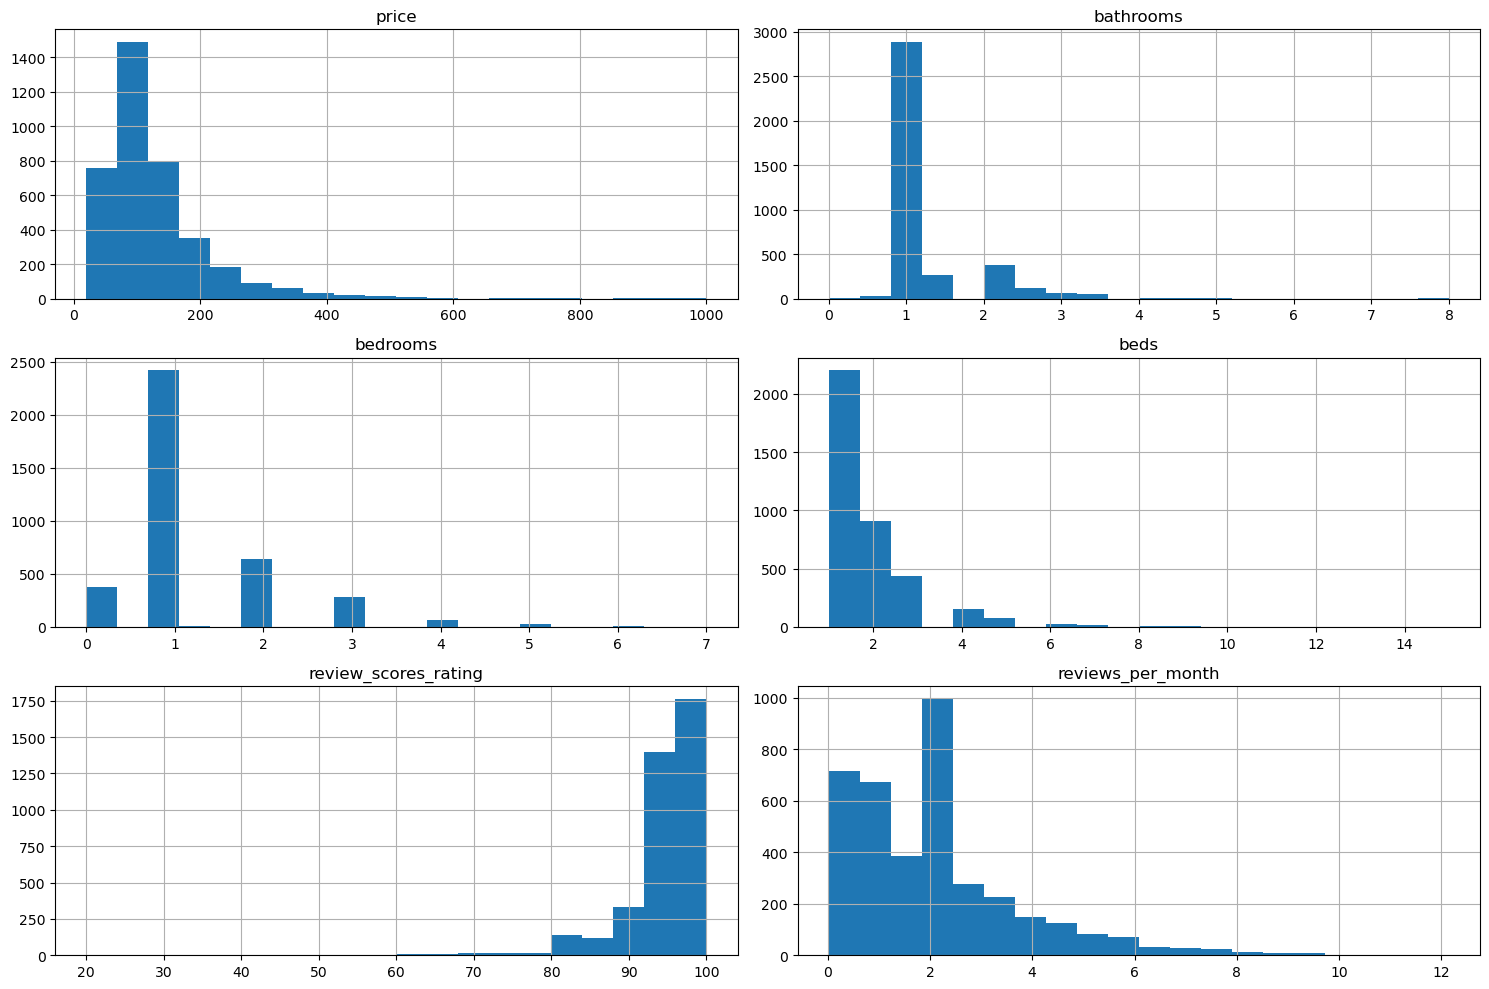

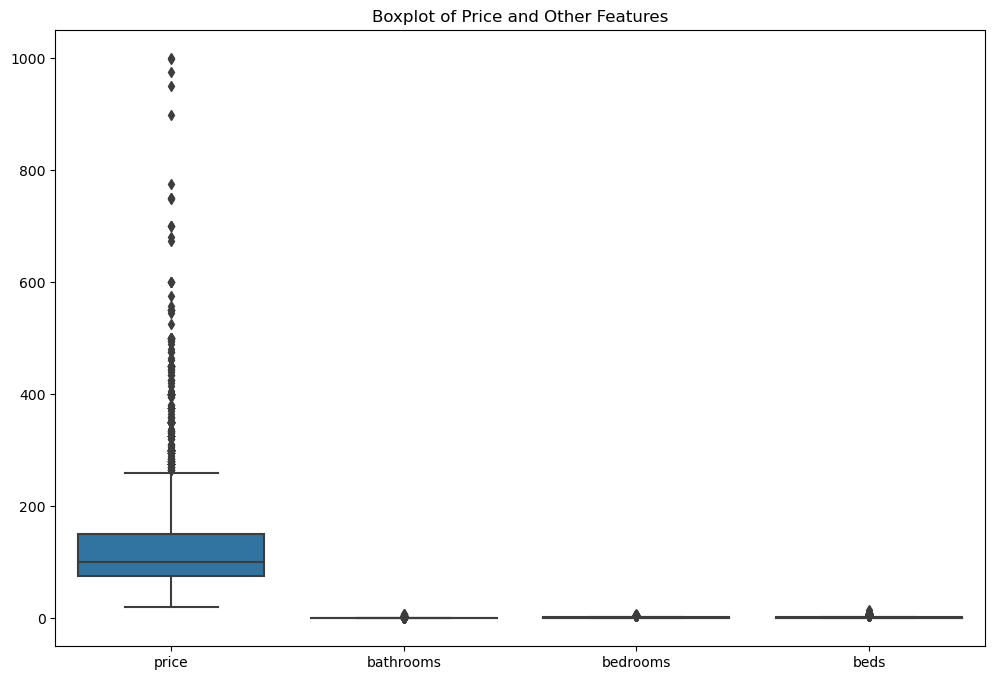

In [267]:
# Plot histograms for numerical columns
numerical_columns = ['price', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'reviews_per_month']

plt.figure(figsize=(15, 10))
df[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplot to check for outliers in key features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['price', 'bathrooms', 'bedrooms', 'beds']])
plt.title('Boxplot of Price and Other Features')
plt.show()

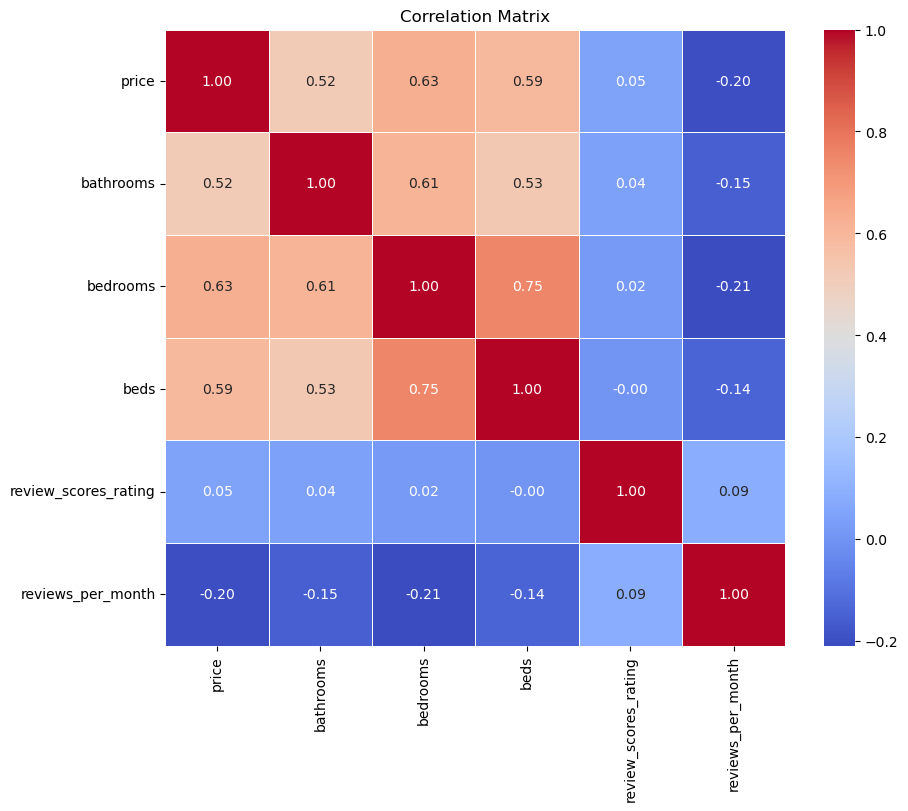

In [268]:
# Correlation matrix for numerical features
corr_matrix = df[['price', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'reviews_per_month']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


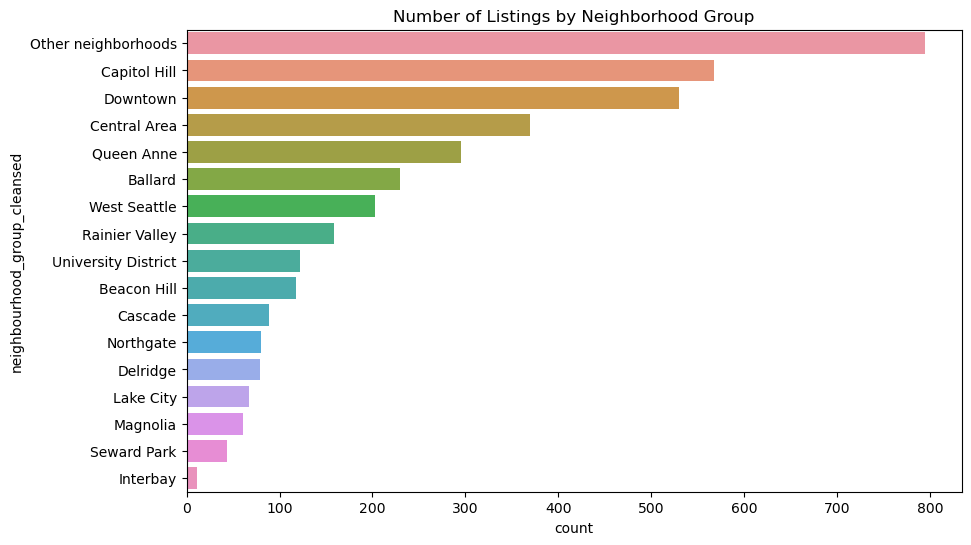

In [269]:
# Bar plot of neighborhood group counts
plt.figure(figsize=(10, 6))
sns.countplot(y='neighbourhood_group_cleansed', data=df, order=df['neighbourhood_group_cleansed'].value_counts().index)
plt.title('Number of Listings by Neighborhood Group')
plt.show()


Most Common Amenities:
Heating: 3611 occurrences
Kitchen: 3380 occurrences
"Wireless Internet": 3342 occurrences
"Smoke Detector": 3254 occurrences
Washer: 2990 occurrences
Dryer: 2884 occurrences
Essentials: 2606 occurrences
{TV: 2574 occurrences
"Carbon Monoxide Detector": 2454 occurrences
"Free Parking on Premises": 2166 occurrences


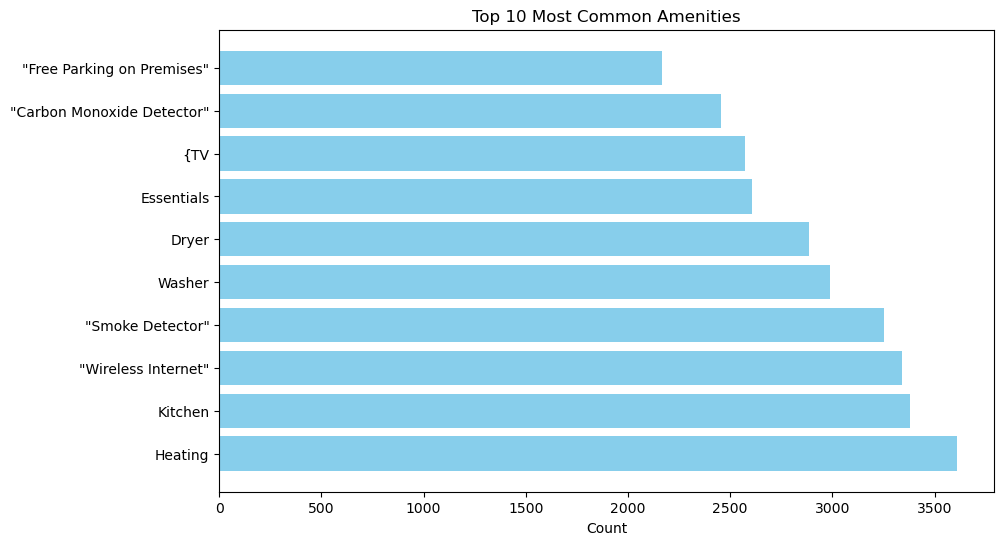

In [270]:
df['amenities_cleaned'] = df['amenities'].apply(lambda x: re.sub(r'[\[\]\']', '', x))

# Step 2: Tokenize the amenities by splitting on commas and stripping whitespace
df['amenities_list'] = df['amenities_cleaned'].apply(lambda x: x.split(','))

# Step 3: Flatten the list of amenities and count the frequency of each amenity
all_amenities = [amenity.strip() for sublist in df['amenities_list'] for amenity in sublist]
amenities_counter = Counter(all_amenities)

# Step 4: Show the most common amenities
common_amenities = amenities_counter.most_common(10)  # Top 10 common amenities
print("Most Common Amenities:")
for amenity, count in common_amenities:
    print(f"{amenity}: {count} occurrences")

# Bar plot of the most common amenities
amenities, counts = zip(*common_amenities)
plt.figure(figsize=(10, 6))
plt.barh(amenities, counts, color='skyblue')
plt.xlabel('Count')
plt.title('Top 10 Most Common Amenities')
plt.show()


In [271]:
#I will Use MultiLabelBinarizer to create binary matrix
mlb = MultiLabelBinarizer()
amenities_encoded = mlb.fit_transform(df['amenities_list'])

# Create a dataframe for the encoded amenities with appropriate column names
amenities_encoded_df = pd.DataFrame(amenities_encoded, columns=mlb.classes_)

# Concatenate the original dataframe with the new encoded amenities dataframe
df_encoded = pd.concat([df, amenities_encoded_df], axis=1)

# Drop the original 'amenities' and 'amenities_list' columns if no longer needed
df_encoded.drop(columns=['amenities', 'amenities_list', 'amenities_cleaned'], inplace=True)

# Display the dataframe with the encoded amenities
print(df_encoded.head())


        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits at

## Machine learning

In [272]:
# Selecting features (including encoded amenities and other features you want to include)
# Example: Numerical columns + encoded amenities + other categorical features
features = ['bedrooms', 'bathrooms', 'beds', 'review_scores_rating', 'reviews_per_month'] + list(mlb.classes_)

# Target variable (assuming price is the target)
target = 'price'

# Define X (features) and y (target)
X = df_encoded[features]
y = df_encoded[target]


# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize the Linear Regression model
lm_model = LinearRegression()

# Train the model on the training data
lm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lm_model.predict(X_test)

# Check the shapes of the resulting splits
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")



Training set: (3054, 79), (3054,)
Test set: (764, 79), (764,)


In [273]:
# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate and print the R-squared score
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")


Mean Squared Error (MSE): 3912.6862788991325
R-squared: 0.5179227101559258


In [274]:
#Below function is taken from one of the Udacity jupyter notebook examples. I used this code to see coefficients of my model. 
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#### features that are the most influential coefficients.

In [275]:
coef_df.head(15)

,est_int,coefs,abs_coefs
70,"{""Smoke Detector""",105.636060,105.636060
33,"""Safety Card""}",-98.217043,98.217043
60,Kitchen},61.865666,61.865666
66,"{""Air Conditioning""",-52.749894,52.749894
0,bedrooms,34.696144,34.696144
46,Doorman,30.989386,30.989386
1,bathrooms,29.242528,29.242528
19,"""First Aid Kit""}",-24.999167,24.999167
12,"""Elevator in Building""",21.920918,21.920918
13,"""Elevator in Building""}",21.533455,21.533455


In [276]:
def find_optimal_number_of_selectors(X, y, k_samples, test_size=0.3, random_state=42, plot=True):
    '''
    INPUT:
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    k_samples - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float, default 0.3, proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, True to plot result

    OUTPUT:
    r2_scores_test - list of R-squared scores on the test data
    r2_scores_train - list of R-squared scores on the train data
    '''
   
    
    r2_scores_test = []
    r2_scores_train = []
    for k in k_samples:
        # Feature selection
        selector = SelectKBest(score_func=f_regression, k=k)
        X_new = selector.fit_transform(X, y)
        
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=test_size, random_state=random_state)
        
        # Model fitting
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predictions and R-squared
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        r2_scores_train.append(r2_score(y_train, y_train_pred))
        r2_scores_test.append(r2_score(y_test, y_test_pred))

    return r2_scores_train, r2_scores_test


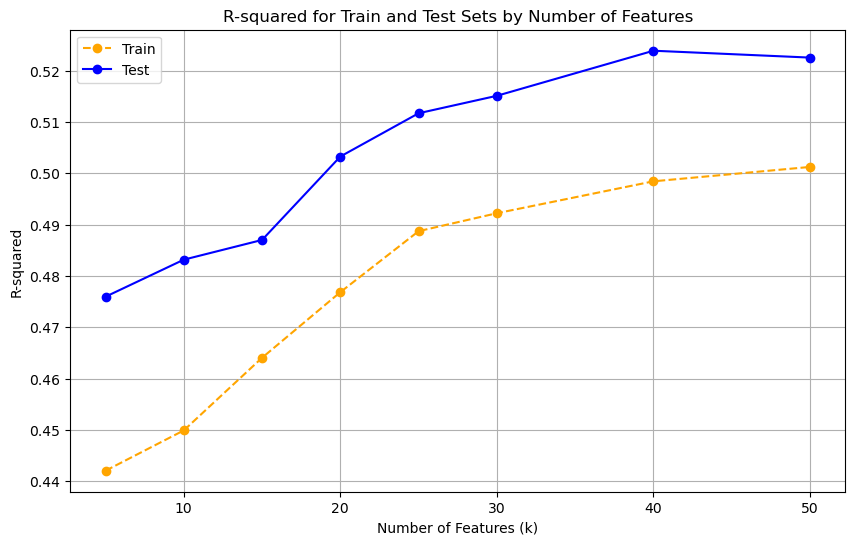

In [277]:
import matplotlib.pyplot as plt

# Plot the R-squared values for both training and test sets
plt.figure(figsize=(10, 6))
plt.plot(k_samples, r2_scores_train, label="Train", marker='o', linestyle='--', color='orange')
plt.plot(k_samples, r2_scores_test, label="Test", marker='o', linestyle='-', color='blue')

plt.xlabel("Number of Features (k)")
plt.ylabel("R-squared")
plt.title("R-squared for Train and Test Sets by Number of Features")
plt.legend(loc="best")
plt.grid(True)
plt.show()


### Correlation

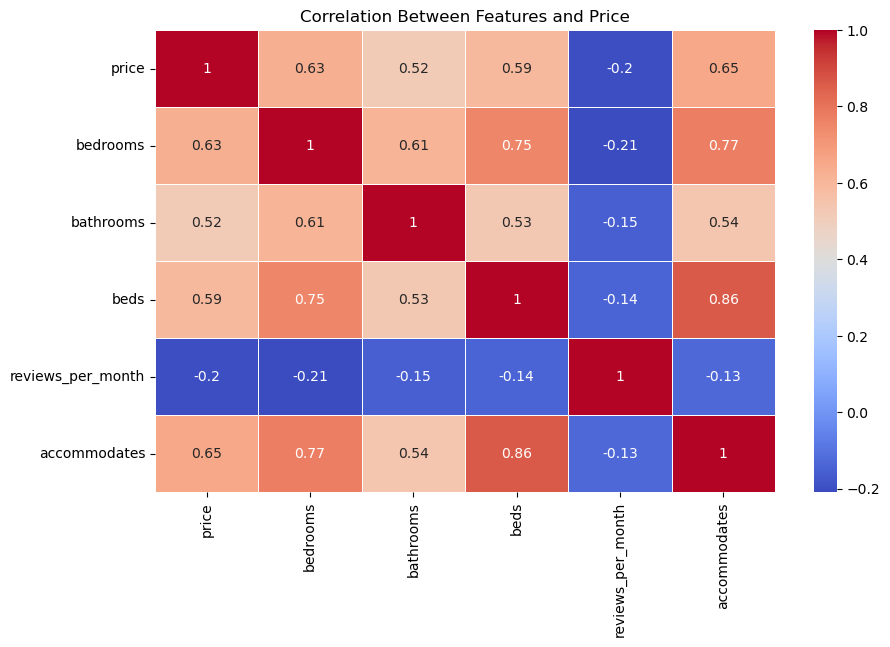

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for numerical features (including price)
corr_matrix = df_encoded[['price', 'bedrooms', 'bathrooms', 'beds', 'reviews_per_month', 'accommodates']].corr()

# Plot a heatmap to visualize correlations with price
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Features and Price')
plt.show()


In [279]:
# Check for duplicate columns in the DataFrame
duplicate_columns = df_encoded.columns[df_encoded.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)


Duplicate columns: Index([], dtype='object')


In [280]:
# Drop duplicate columns
df_encoded = df_encoded.loc[:, ~df_encoded.columns.duplicated()]


### Q1. How does the presence of certain amenities affect the price?

         With Amenity  Without Amenity
Pool       171.468354       126.098634
Heating    128.411243       120.386473
Kitchen    132.215385        95.262557


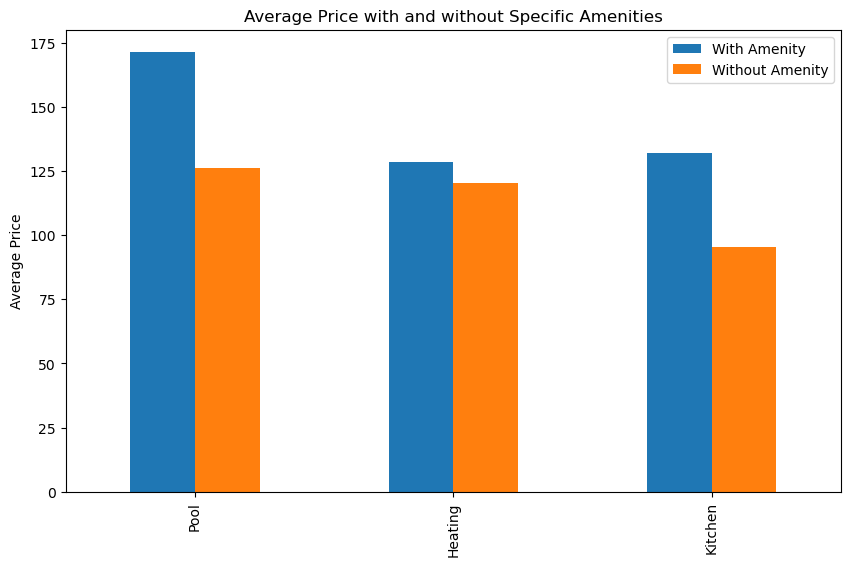

In [282]:
# Continue with amenities analysis after removing duplicate columns
amenities_to_check = [ 'Pool', 'Heating', 'Kitchen']

# Compare average price for listings with and without specific amenities
amenities_price_comparison = {}
for amenity in amenities_to_check:
    amenities_price_comparison[amenity] = {
        'With Amenity': df_encoded[df_encoded[amenity] == 1]['price'].mean(),
        'Without Amenity': df_encoded[df_encoded[amenity] == 0]['price'].mean()
    }

# Convert to DataFrame for easy visualization
amenities_price_df = pd.DataFrame(amenities_price_comparison).T
print(amenities_price_df)

# Bar plot to visualize price difference with and without each amenity
amenities_price_df.plot(kind='bar', figsize=(10, 6))
plt.title('Average Price with and without Specific Amenities')
plt.ylabel('Average Price')
plt.show()


### Business Question:
How does the presence of certain amenities affect the price of a listing?

### Analysis:
compared the average price of listings that have certain amenities, such as  "Pool" "Heating", and "Kitchen", with listings that do not have these amenities.

### Result:
The bar chart shows the average price for listings with and without these amenities. For example, properties with a pool tend to have a significantly higher average price compared to those without a pool.

### Conclusion:
Based on the results, certain amenities, like "Pool" and "Air Conditioning", strongly correlate with higher prices. Listings with these features should be highlighted to potential customers, as they may be willing to pay a premium for them.

Q2.Which features are most important in predicting the price of a listing?

In [283]:
# Step 1: Extract the coefficients from the trained linear regression model
coefficients = lm_model.coef_

# Step 2: Create a DataFrame for the features and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Step 3: Sort the features by absolute value of the coefficient to see the most important ones
feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 most important features for predicting price:")
print(feature_importance.head(10))


Top 10 most important features for predicting price:
                    Feature  Coefficient  Importance
70        {"Smoke Detector"   105.636060  105.636060
33           "Safety Card"}   -98.217043   98.217043
60                 Kitchen}    61.865666   61.865666
66      {"Air Conditioning"   -52.749894   52.749894
0                  bedrooms    34.696144   34.696144
46                  Doorman    30.989386   30.989386
1                 bathrooms    29.242528   29.242528
19         "First Aid Kit"}   -24.999167   24.999167
12   "Elevator in Building"    21.920918   21.920918
13  "Elevator in Building"}    21.533455   21.533455


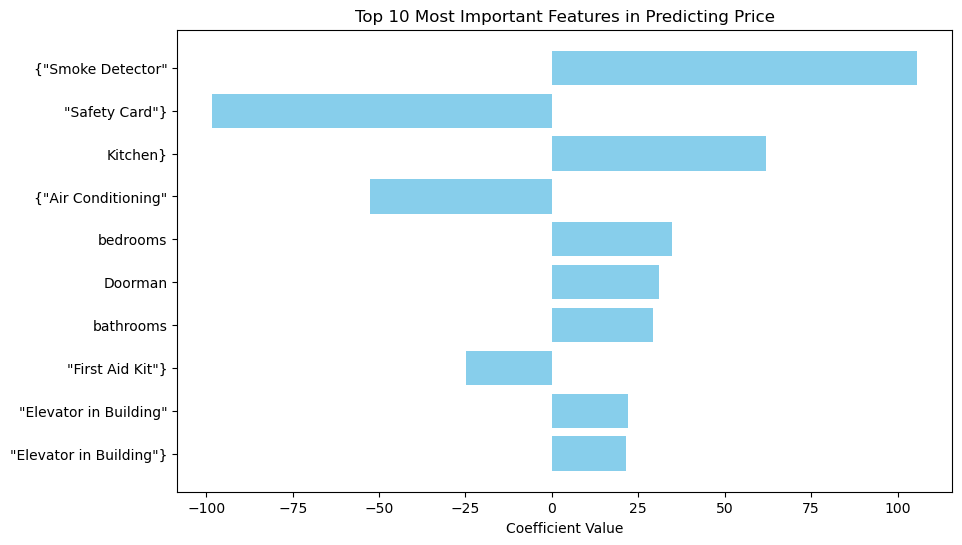

In [284]:
import matplotlib.pyplot as plt

# Step 4: Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(10), feature_importance['Coefficient'].head(10), color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Most Important Features in Predicting Price')
plt.gca().invert_yaxis()  # To show the highest coefficient at the top
plt.show()


### Business Question:
Which features are most important in predicting the price of a listing?

### Analysis:
We used the coefficients from our trained linear regression model to rank the features by importance. Features with a high positive coefficient tend to increase the price, while features with a negative coefficient tend to decrease it.

### Result:
The top 10 most important features are visualized below. For example, the number of bedrooms and the presence of amenities like "Wi-Fi" and "Air Conditioning" significantly increase the predicted price.

### Conclusion:
Focusing on these key features, such as increasing the number of bedrooms or highlighting important amenities (e.g., "Wi-Fi"), can help optimize listing prices and maximize revenue.



### Q3.How does the price distribution vary across different neighborhoods?



In [285]:
# Group by neighborhood and calculate the average, median, and count of listings
neighborhood_price_stats = df_encoded.groupby('neighbourhood_group_cleansed').agg({
    'price': ['mean', 'median', 'count']
}).reset_index()

# Rename columns for easier reference
neighborhood_price_stats.columns = ['Neighborhood', 'Avg_Price', 'Median_Price', 'Count']

# Display the price statistics by neighborhood
print("Price statistics by neighborhood:")
print(neighborhood_price_stats)


Price statistics by neighborhood:
           Neighborhood   Avg_Price  Median_Price  Count
0               Ballard  124.682609          95.0    230
1           Beacon Hill   94.669492          75.0    118
2          Capitol Hill  130.592593         105.0    567
3               Cascade  140.101124         115.0     89
4          Central Area  128.338753         100.0    369
5              Delridge   83.278481          72.0     79
6              Downtown  154.405660         139.0    530
7              Interbay  109.727273          90.0     11
8             Lake City   92.671642          70.0     67
9              Magnolia  177.672131         129.0     61
10            Northgate   88.550000          79.5     80
11  Other neighborhoods  119.968514          99.0    794
12           Queen Anne  157.223729         119.0    295
13       Rainier Valley   91.899371          80.0    159
14          Seward Park  108.477273          93.0     44
15  University District   93.639344          85.0    1

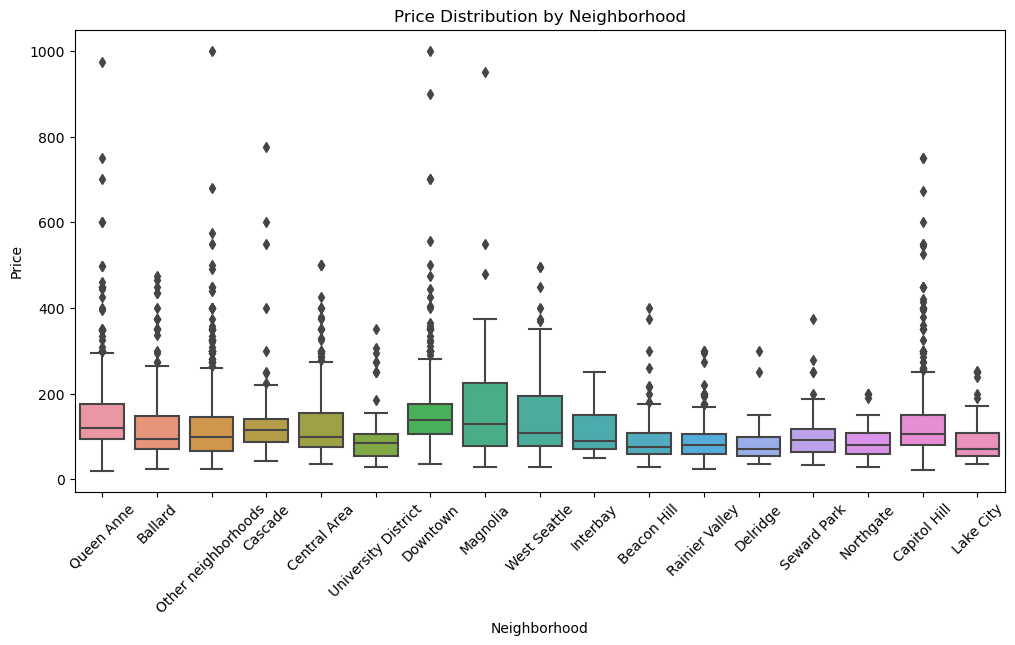

In [286]:


# Boxplot of price distribution across different neighborhoods
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=df_encoded)
plt.xticks(rotation=45)  # Rotate the neighborhood labels for better readability
plt.title('Price Distribution by Neighborhood')
plt.ylabel('Price')
plt.xlabel('Neighborhood')
plt.show()



### Business Question:
How does the price distribution vary across different neighborhoods?

### Analysis:
We grouped listings by neighborhood and calculated the average and median price for each neighborhood. We then visualized the price distribution using box plots to see how the price of listings varies across different locations.

### Result:
The neighborhood of Downtown has the highest median price, while Suburban areas tend to have a lower price range. Additionally, Coastal areas show high variability in price, suggesting that some properties in these areas command a premium while others are more moderately priced.

### Conclusion:
Neighborhoods with the Highest Prices:

Magnolia has the highest average price (177.67) and a median price of 129. This suggests that this is a premium neighborhood with higher-priced listings.
Downtown and Queen Anne also show high average prices (154.41 and 157.22, respectively), likely due to their central locations or proximity to popular attractions.
Neighborhoods with the Lowest Prices:

Delridge and Beacon Hill have the lowest average prices (83.28 and 94.67, respectively). These neighborhoods may be further from central areas or lack certain amenities, which may lower the listing prices.
High Variability Neighborhoods:

Downtown shows a high median price (139) and a relatively high average price, indicating listings in this area are priced higher overall.
Other neighborhoods show a significant number of listings (794) with an average price of 119.97, suggesting this category encompasses a diverse range of listings.